In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [4]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [7]:
NUM_CLASSES = 7

# Dataset reading

In [10]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [12]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [23]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [26]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1406 - loss: 1.9738
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.1370 - loss: 2.0032 - val_accuracy: 0.1929 - val_loss: 1.9790
Epoch 2/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.1953 - loss: 1.9633
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1609 - loss: 1.9697 - val_accuracy: 0.2571 - val_loss: 1.9328
Epoch 3/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1406 - loss: 1.9652
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1460 - loss: 1.9433 - val_accuracy: 0.3071 - val_loss: 1.8897
Epoch 4/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2344 - loss: 1.8860
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━

In [28]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8185 - loss: 0.2419 


In [30]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [32]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[2.9563057e-04 5.1129380e-05 1.3814573e-04 2.2907717e-02 8.3464505e-03
 9.2699450e-01 4.1266344e-02]
5


# Confusion matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


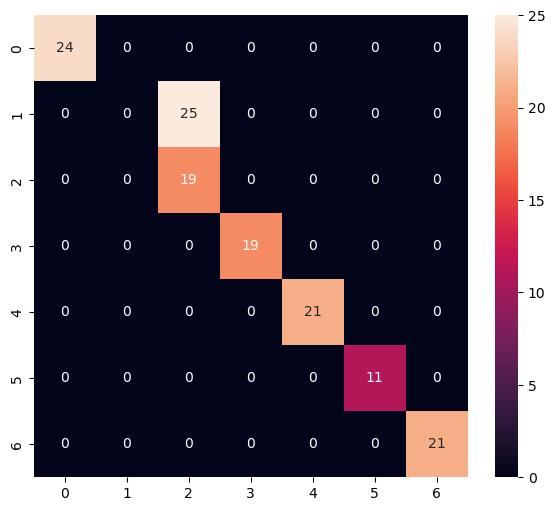

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.00      0.00      0.00        25
           2       0.43      1.00      0.60        19
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        21

    accuracy                           0.82       140
   macro avg       0.78      0.86      0.80       140
weighted avg       0.74      0.82      0.77       140



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [37]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
print(type(model))


<class 'keras.src.models.sequential.Sequential'>


In [41]:
import tensorflow as tf
print(tf.__version__)  # Ensure it's TensorFlow 2.x

2.16.2


In [ ]:
# Convert the model to TFLite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable optimization for quantization
tflite_model = converter.convert()

# Save the quantized TFLite model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\SAUMITRA\AppData\Local\Temp\tmpu2gbbof5\assets


INFO:tensorflow:Assets written to: C:\Users\SAUMITRA\AppData\Local\Temp\tmpu2gbbof5\assets


In [ ]:
# # Convert to TensorFlow Lite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# # Save the quantized model
# tflite_save_path = "model.tflite"  # Ensure valid path
# with open(tflite_save_path, 'wb') as f:
#     f.write(tflite_quantized_model)

# print("Model successfully converted and saved at:", tflite_save_path)

INFO:tensorflow:Assets written to: C:\Users\SAUMITRA\AppData\Local\Temp\tmpbgaxdzco\assets


INFO:tensorflow:Assets written to: C:\Users\SAUMITRA\AppData\Local\Temp\tmpbgaxdzco\assets


: 

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\SAUMITRA\AppData\Local\Temp\tmph_445_1k\assets


INFO:tensorflow:Assets written to: C:\Users\SAUMITRA\AppData\Local\Temp\tmph_445_1k\assets


: 

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

NameError: name 'tf' is not defined

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 131 µs, sys: 17 µs, total: 148 µs
Wall time: 679 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8105639e-01 1.8674169e-02 2.2328216e-04 4.6191799e-05]
0
